In [145]:
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sts
import numpy as np

In [146]:
n = 100
teta = 10
beta = 0.95

# Задача 4

вычисление точного доверительного интервала

In [147]:
def exact_interval(m_x):
  t1,t2 = m_x.max() / (1 + (beta) ** (1/n)), m_x.max() / (1 + (1 - beta) ** (1/n))
  print ('точный интервал: (' ,round(t1, 3),', ', round(t2, 3), ')')
  return (round(t1, 3), round(t2, 3))

вычисление асимптотического доверительного интервала по ОММ

In [148]:
def asymp_interval_omm(m_x):
  t1= 2 * np.sqrt(3*n) * np.mean(m_x) / (1.96 + 3*np.sqrt(3*n))
  t2 = 2 * np.sqrt(3*n) * np.mean(m_x) / (-1.96+ 3*np.sqrt(3*n))
  print ('Асимптотический интервал по ОММ: (', round(t1, 3), ', ', round(t2, 3), ')')
  return (round(t1, 3), round(t2, 3))

вычисление асимптотического доверительного интервала по ОМП

In [149]:
def asymp_interval_omp(m_x):
  t1 = ((n + 1) * np.max(m_x)) / ((2 * n + 1) * (1.96 / np.sqrt(n) + 1))
  t2 = ((n + 1) * np.max(m_x)) / ((2 * n + 1) * (-1.96 / np.sqrt(n) + 1))
  print('Асимптотический интервал по ОМП: (', round(t1, 3), ', ', round(t2, 3), ')')
  return (round(t1, 3), round(t2, 3))

непараметричсекий бутстрап

In [150]:
def bootstrap(m_x):
  delta = np.array([])
  teta_ = 2/3 * m_x.mean()
  for i in range(0, 1000):
      sample = np.random.choice(m_x, size=m_x.shape[0]).round(3)
      delta = np.append(delta, 2/3 * sample.mean() - teta_)
  delta.sort()
  t1, t2= teta_ - delta[974], teta_ - delta[24]
  print('непараметрический бутстрап интервал: (', round(t1, 3), ', ', round(t2, 3), ')')
  return (round(t1, 3), round(t2, 3))

генерация выборки

In [151]:
x = np.random.uniform(teta, 2 * teta, n)
x = x.round(3)

точный интервал:

In [152]:
e_int = exact_interval(x)

точный интервал: ( 9.981 ,  10.127 )


In [153]:
a_int_omm = asymp_interval_omm(x)

Асимптотический интервал по ОММ: ( 9.607 ,  10.36 )


In [154]:
a_int_omp = asymp_interval_omp(x)

Асимптотический интервал по ОМП: ( 8.384 ,  12.472 )


In [155]:
b_int = bootstrap(x)

непараметрический бутстрап интервал: ( 9.59 ,  10.356 )


Сравнение

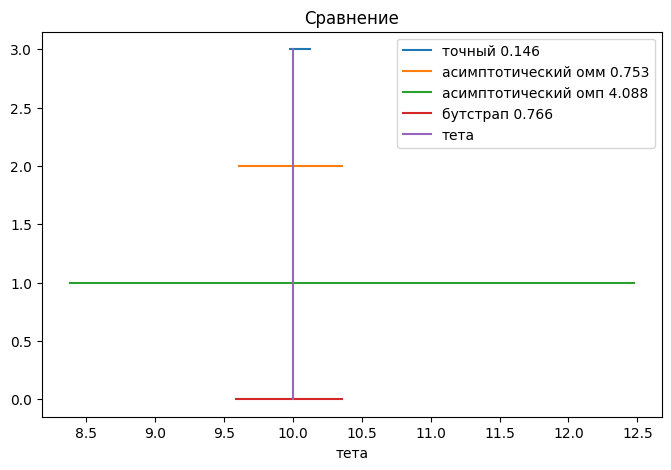

In [156]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot([e_int[0], e_int[1]], [3, 3], label = f'точный {np.round(np.abs(e_int[0]-  e_int[1]), 3)}')
ax.plot([a_int_omm[0], a_int_omm[1]], [2, 2], label = f'асимптотический омм {np.round(np.abs(a_int_omm[0]-  a_int_omm[1]), 3)}')
ax.plot([a_int_omp[0], a_int_omp[1]], [1, 1], label = f'асимптотический омп {np.round(np.abs(a_int_omp[0]-  a_int_omp[1]), 3)}')
ax.plot([b_int[0], b_int[1]], [0, 0], label = f'бутстрап {np.round(np.abs(b_int[0]-  b_int[1]), 3)}')
ax.plot([teta, teta], [0,3], label = 'тета')
ax.set_title('Сравнение')
ax.set_xlabel('тета')
ax.legend();

# Задача 5

In [157]:
x = sts.pareto(b = teta).rvs(n)
teta_ = n / np.sum(np.log(x)) + 1             #оценка омп

асимптотический интервал омп для тета

In [158]:
def asymp_interval_teta(m_x):
  t1 = teta_ - 1.96 * (teta_ - 1) / (n ** 0.5)
  t2 = teta_ + 1.96 * (teta_ - 1) / (n ** 0.5)
  print('aсимпотический интервал для тета: (', round(t1, 3), ', ', round(t2, 3), ')')
  print('teta', round(teta_, 3))
  return (round(t1, 3), round(t2, 3))

доверительный интервал для медианы

In [159]:
def med_int (m_x):
  t1 = 2 **(1 / (teta_ - 1)) * (1 - 1.97 * np.log(2) / (np.sqrt(n) * (teta_ - 1)))
  t2 = 2 **(1 / (teta_ - 1)) * (1 + 1.97 * np.log(2) / (np.sqrt(n) * (teta_ - 1)))
  print('Доверительный интервал для медианы: (', round(t1, 3), ',', round(t2, 3), ')')
  x_med = (np.sort(m_x)[49] + np.sort(m_x)[48]) / 2
  print("x_med", round(x_med, 3))

параметрический бутстрап

In [160]:
def param_bootsrap(m_x):
  delta_p=[]
  m = 10000
  for i in range(m):
      sample = sts.pareto(b=teta).rvs(n)
      delta = n / np.sum(np.log(sample)) + 1 - teta_
      delta_p.append(delta)
  k1 = int((1 - beta) / 2 * m)
  k2 = int((1 + beta) / 2 * m)
  t1 = teta_ + np.sort(np.array(delta_p))[k1]
  t2 = teta_ + np.sort(np.array(delta_p))[k2]
  print('параметрический бутстрап интервал: (', round(t1, 3), ', ', round(t2, 3), ')')
  print('тета', teta)
  return (round(t1, 3), round(t2, 3))

непараметрический бутстрап

In [161]:
def non_param_bootstrap(m_x):
  s_delta = []
  for i in range(1000):
    sample = np.random.choice(m_x, n)
    delta = n / np.sum(np.log(sample)) + 1
    s_delta.append(delta - teta_)
  t1 = teta_ - np.sort(np.array(s_delta))[24]
  t2 = teta_ - np.sort(np.array(s_delta))[974]
  print('непараметрический бутстрап интервал: (', round(t1, 3), ', ', round(t2, 3), ')')
  print('тета', teta)
  return (round(t1, 3), round(t2, 3))

In [162]:
med_int(x)

Доверительный интервал для медианы: ( 1.064 , 1.097 )
x_med 1.088


In [163]:
a_int = asymp_interval_teta(x)

aсимпотический интервал для тета: ( 8.223 ,  11.744 )
teta 9.983


In [164]:
b_non_int = non_param_bootstrap(x)

непараметрический бутстрап интервал: ( 11.415 ,  8.014 )
тета 10


In [165]:
b_par_int = param_bootsrap(x)

параметрический бутстрап интервал: ( 9.307 ,  13.288 )
тета 10


сравнение

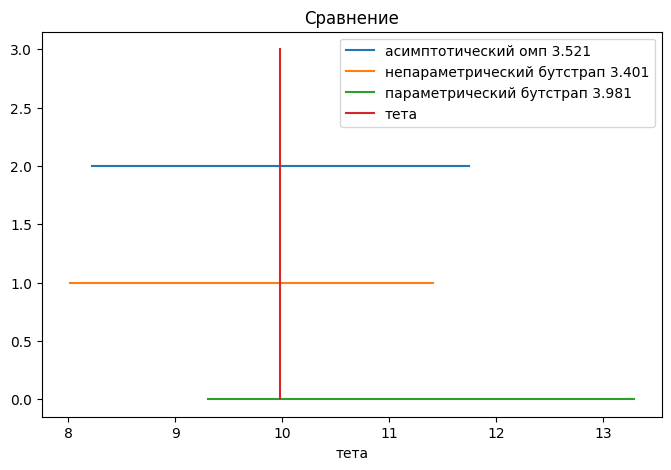

In [167]:
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot([a_int[0], a_int[1]], [2, 2], label = f'асимптотический омп {np.round(np.abs(a_int[0]-  a_int[1]), 3)}')
ax1.plot([b_non_int[0], b_non_int[1]], [1, 1], label = f'непараметрический бутстрап {np.round(np.abs(b_non_int[0] - b_non_int[1]), 3)}')
ax1.plot([b_par_int[0], b_par_int[1]], [0, 0], label = f'параметрический бутстрап {np.round(np.abs(b_par_int[0]-  b_par_int[1]), 3)}')
ax1.plot([teta_, teta_], [0,3], label = 'тета')
ax1.set_title('Сравнение')
ax1.set_xlabel('тета')
ax1.legend();